In [7]:
import astropy
from astroquery.simbad import Simbad

In [8]:
# Dependencies 
# astroquery

In [9]:
Simbad.query_objectids('NQ Dra', cache=False)

ID
bytes29
TIC 359678119
V* NQ Dra
2MASS J18441316+5740594
GSC 03926-00508
NSV 11317
NSVS 3043060
SV* SON 9663
UCAC3 296-130079
Gaia DR2 2154100169676165120


In [10]:
Object_name = "NQ Dra"
list_id = Simbad.query_objectids(Object_name, cache=False)

In [11]:
for i in list_id['ID']:
    if i[0:8] == "Gaia DR2":
        print (i)
        print (i[5:])

Gaia DR2 2154100169676165120
DR2 2154100169676165120


In [86]:
def gaia_id(Obj_name):
    """ Returns Gaia id for objects available in SIMBAD"""
    list_id = Simbad.query_objectids(Obj_name, cache=False)
    for i in list_id['ID']:
        if i[0:8] == "Gaia DR2":
            print (i)
            gaia_id = i
    return gaia_id[5:]

id = gaia_id("CQ Gem")
gaia_id=id.split()[1]

Gaia DR2 3373085521202437632


In [74]:
from astroquery.gaia import Gaia
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
#Not required - Only for launching the job
job = Gaia.launch_job_async("SELECT  source_id, phot_variable_flag, datalink_url \
from gaiadr2.gaia_source \
where source_id in ("+ gaia_id +") \
and phot_variable_flag = 'VARIABLE';"
, output_file='data/' + gaia_id + '.csv', output_format='csv', verbose=False, dump_to_file=True)

Saving results to: data/3373085521202437632.csv


In [98]:
#Not Required
url_csv=pd.read_csv('data/3373085521202437632.csv')
url_1=url_csv['datalink_url'][0]
print(url_1)
#####


###Required
url='https://gea.esac.esa.int/data-server/data?ID=Gaia+DR2+'+gaia_id+'&RETRIEVAL_TYPE=EPOCH_PHOTOMETRY&FORMAT=CSV'
print(url)
#######



# https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+3373085521202437632
# 'https://gea.esac.esa.int/data-server/data?ID=Gaia+DR2+3373085521202437632&RETRIEVAL_TYPE=EPOCH_PHOTOMETRY&FORMAT=CSV'

https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+3373085521202437632
https://gea.esac.esa.int/data-server/data?ID=Gaia+DR2+3373085521202437632&RETRIEVAL_TYPE=EPOCH_PHOTOMETRY&FORMAT=CSV


In [102]:
##Required - Download the csv having the lightcurve
r = requests.get(url, allow_redirects=True)
open('data/'+gaia_id+'_data.csv', 'wb').write(r.content)

8997

In [100]:
##Required- Reading the csv
lk=pd.read_csv('data/'+gaia_id+'_data.csv')
lk.head()

,source_id,transit_id,band,time,mag,flux,flux_error,flux_over_error,rejected_by_photometry,rejected_by_variability,other_flags,solution_id
0,3373085521202437632,17694515304862062,G,1716.838373,10.427959,1.271050e+06,5190.518902,244.87915,False,True,4097,369295546864633574
1,3373085521202437632,17694515306172781,G,1716.838373,10.428556,1.270351e+06,5105.878398,248.80167,False,True,4097,369295546864633574
2,3373085521202437632,17698607598593968,G,1716.912390,10.438426,1.258855e+06,8202.887091,153.46487,False,False,12288,369295546864633574
3,3373085521202437632,19586118780770130,G,1751.050451,10.383509,1.324166e+06,8824.515808,150.05539,False,False,4097,369295546864633574
4,3373085521202437632,26900786954801585,G,1883.333725,10.201641,1.565633e+06,10013.992715,156.34454,False,False,4097,369295546864633574


Text(0, 0.5, 'Flux')

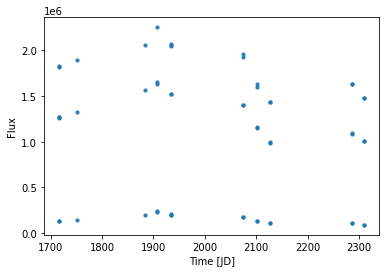

In [101]:
##Required- Plotting a scatter plot
fig = plt.figure()
plt.scatter(lk.time, lk.flux, alpha=0.9, s=10)
plt.xlabel("Time [JD]")
plt.ylabel("Flux")
#plt.title("light curve for DR1 Source", lk.source_id)

In [45]:
##Fetching from DR1 (hardcoded)
dr1_job = Gaia.launch_job_async("SELECT curves.observation_time, \
  mod(curves.observation_time - rrlyrae.epoch_g, rrlyrae.p1)/ rrlyrae.p1 as phase, \
  curves.g_magnitude, 2.5/log(10)* curves.g_flux_error/ curves.g_flux AS g_magnitude_error, \
  rejected_by_variability_processing AS rejected \
FROM gaiadr1.phot_variable_time_series_gfov AS curves \
INNER JOIN gaiadr1.rrlyrae AS rrlyrae \
  ON rrlyrae.source_id = curves.source_id \
WHERE rrlyrae.source_id = 5284240582308398080",
output_file='data/DR1_5284240582308398080.csv', output_format='csv', verbose=False, dump_to_file=True)

Launched query: 'SELECT curves.observation_time,   mod(curves.observation_time - rrlyrae.epoch_g, rrlyrae.p1)/ rrlyrae.p1 as phase,   curves.g_magnitude, 2.5/log(10)* curves.g_flux_error/ curves.g_flux AS g_magnitude_error,   rejected_by_variability_processing AS rejected FROM gaiadr1.phot_variable_time_series_gfov AS curves INNER JOIN gaiadr1.rrlyrae AS rrlyrae   ON rrlyrae.source_id = curves.source_id WHERE rrlyrae.source_id = 5284240582308398080'
------>https
host = gea.esac.esa.int:443
context = /tap-server/tap/async
Content-type = application/x-www-form-urlencoded
303 303
[('Date', 'Thu, 24 Jun 2021 07:54:02 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/5.4.16 mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEORIGIN'), ('X-Content-Type-Options', 'nosniff'), ('Set-Cookie', 'JSESSIONID=F21907E4378B826855C9FEE696083739; Path=

In [46]:
lk_dr1=pd.read_csv('data/DR1_5284240582308398080.csv')
lk_dr1.head()

,observation_time,phase,g_magnitude,g_magnitude_error,rejected
0,1666.476607,0.159632,18.621802,0.016159,False
1,1666.652765,0.449856,18.962439,0.009896,False
2,1666.726771,0.571785,19.043705,0.010901,False
3,1666.902929,0.862009,19.189978,0.010247,False
4,1666.976936,0.983937,18.303622,0.010295,False


Text(0.5, 1.0, 'light curve for DR1 Source 5284240582308398080')

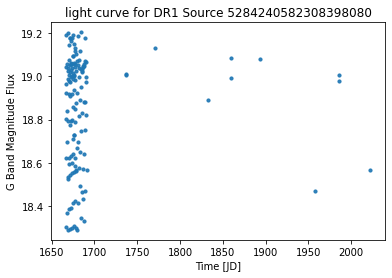

In [59]:
fig = plt.figure()
plt.scatter(lk_dr1.observation_time, lk_dr1.g_magnitude, alpha=0.9, s=10)
plt.xlabel("Time [JD]")
plt.ylabel("G Band Magnitude Flux")
plt.title("light curve for DR1 Source 5284240582308398080", )